# Ein Jupyter Notebook-Kernel für ProB 2

### David Geleßus
### Bachelorarbeit

TODO Mach das Fazit fertig!

# Einführung: Notebooks, Jupyter

## Was ist ein Notebook?

* Dokument mit Text und ausführbaren Code-Abschnitten
* Code kann interaktiv ausgeführt werden
* Ergebnisse erscheinen im Notebook unter dem jeweiligem Code
* Ähnlich wie eine REPL (read-eval-print-loop), mit einigen Unterschieden:
    * Code-Abschnitte können "außer der Reihe" bearbeitet und ausgeführt werden
    * Ausgaben können formatierten Text und Grafiken enthalten
    * Speicherbar als Datei
    * Code kann später neu ausgeführt werden
    * Weitergabe an andere Nutzer möglich
* Implementierungen: Mathematica, Maple, Jupyter, u. a.

* Punkte zum Notebook-Konzept im Allgemeinen
* Unabhängig von einer speziellen Implementierung
* (Folie)

## Jupyter Notebook

* Browserbasierte Notebook-Oberfläche
* Open Source und plattformübergreifend
* Stammt aus der Python-Community, in Python implementiert
* Jupyter-Notebooks können aber verschiedene Programmiersprachen verwenden
* Dazu trennt Jupyter strikt zwischen Frontend und Kernel:
    * Das allgemeine **Frontend** implementiert z. B. Benutzeroberfläche und Dateiformat
    * Ein sprachspezifischer **Kernel** stellt die Sprache dem Frontend zur Verfügung
* Schnittstellen zwischen Frontend und Kernel sind sprachneutral
    * Kernel können in (fast) jeder Sprache implementiert werden, kein Python-Code nötig

## Architektur von Jupyter

* **Frontend:** z. B. Jupyter Notebook
    * Unabhängig davon, welche Programmiersprache im Notebook verwendet wird
    * Implementiert z. B. Benutzeroberfläche und Notebook-Dateiformat
    * Benutzt einen Kernel, um die Sprache für das Notebook anzusteuern
* **Kernel:** z. B. ipykernel, IRkernel, IJulia, prob2-jupyter-kernel, uvm.
    * Stellt einem Jupyter-Frontend eine Programmiersprache zur Verfügung
    * Implementiert sprachneutrale Schnittstellen, die das Frontend aufrufen kann
    * Kernel können in (fast) jeder Sprache geschrieben werden, kein Python-Code nötig

## Warum Jupyter?

* Solide Grundlage
    * Dateiformat, Oberfläche, Tools, etc. existieren bereits
    * Nur der Kernel muss selbst implementiert werden
* Bewährtes und etabliertes Projekt
    * Aktiv entwickelt seit mehr als 10 Jahren
    * Wird in Lehre, Forschung, Industrie benutzt
    * Eigene Implementierung wäre aufwendig und fehleranfällig
* Kaum Alternativen
    * Andere Notebook-Oberflächen sind schwer oder gar nicht erweiterbar

* Jupyter bildet eine funktionsreiche Grundlage
    * (Folie)
    * Für einen lauffähigen Kernel müssen nur sehr wenige APIs implementiert werden, viele Teile optional
* Jupyter ist bewährt und etabliert
    * (Folie)
* Nur wenige Alternativen
    * Andere Notebook-Oberflächen (Mathematica, Maple, RMarkdown, etc.) sind auf eine Sprache ausgelegt oder schwer erweiterbar

## ProB

* Werkzeug zur Animation, Verifikation und Visualisierung formeller Spezifikationen
* Unterstützt hauptsächlich B-Spezifikationen (klassisches B, Event-B)
* Versteht auch andere Sprachen wie TLA<sup>+</sup> und CSP<sub>M</sub>
* Gemeinsamkeit: alle Sprachen modellieren zustandsbasierte Maschinen
* ProBs APIs sind für alle Sprachen gleich
    * Der ProB 2-Jupyter-Kernel unterstützt daher (fast) alle Sprachen, die ProB versteht

## Architektur von ProB

* **`probcli`:** Kern/Hauptteil von ProB
    * Implementiert in SICStus Prolog
    * Erlaubt Animation, Visualisierung, Verifikation von formellen Spezifikationen
    * Unterstützt u. A. (klassisches) B, Event-B, TLA<sup>+</sup>, CSP<sub>M</sub>
    * Kommandozeilentool oder interaktive REPL
* **ProB 2-Java-API:** (aka ProB 2-Kernel; ≠ ProB 2-Jupyter-Kernel!)
    * Objektorientierte Java-Schnittstelle für ProB
    * Verwaltet automatisch eine oder mehrere `probcli`-Instanzen
* **ProB 2-Jupyter-Kernel:** Jupyter-Kernel-Implementierung für ProB
    * In Java implementiert
    * Ansteuerung von ProB durch ProB 2-Java-API
    * Kommunikation mit Jupyter durch Jupyter-JVM-BaseKernel

# Funktionsweise

## Formeln auswerten

* B-Ausdrücke auswerten und Prädikate lösen wie in `probcli -repl`

In [1]:
{x | x > 1 & x < 50 & not(#y.(y > 1 & y < x & x mod y = 0))}

$\{2,3,5,7,11,13,17,19,23,29,31,37,41,43,47\}$

In [2]:
xx > 2 & yy < 5 & xx < yy

$\mathit{TRUE}$

**Solution:**
* $\mathit{xx} = 3$
* $\mathit{yy} = 4$

In [3]:
xx > 0 & xx < 0

$\mathit{FALSE}$

* (Folie)
* Beispielhaft ein Ausdruck (Menge aller Primzahlen < 50), ein wahres und ein falsches Prädikat

* Einfache mehrzeilige Eingaben
    * Kein Escaping der Newlines nötig

In [4]:
{S, E, N, D, M, O, R, Y} <: 0..9
& S > 0 & M > 0
& card({S, E, N, D, M, O, R, Y}) = 8
&
            S*1000 + E*100 + N*10 + D
+           M*1000 + O*100 + R*10 + E
= M*10000 + O*1000 + N*100 + E*10 + Y

$\mathit{TRUE}$

**Solution:**
* $\mathit{R} = 8$
* $\mathit{S} = 9$
* $\mathit{D} = 7$
* $\mathit{E} = 5$
* $\mathit{Y} = 2$
* $\mathit{M} = 1$
* $\mathit{N} = 6$
* $\mathit{O} = 0$

* "SEND+MORE=MONEY"-Puzzle als komplexeres Beispiel
* (Folie)

## Formatierte Ausgabe

* Ergebnisse werden als $\LaTeX$-Formel formatiert

In [5]:
succ

$\newcommand{\qdot}{\mathord{\mkern1mu\cdot\mkern1mu}}\lambda \_succ\_\qdot(\_succ\_ \in \mathit{INTEGER}\mid \_succ\_ + 1)$

* Ausgabe als Tabelle mit dem `:table`-Kommando möglich (für Mengen von Tupeln)

In [6]:
:table {x, y, z | x > 1 & x <= 10 & y = x**2 & z = x**3}

|x|y|z|
|---|---|---|
|$2$|$4$|$8$|
|$3$|$9$|$27$|
|$4$|$16$|$64$|
|$5$|$25$|$125$|
|$6$|$36$|$216$|
|$7$|$49$|$343$|
|$8$|$64$|$512$|
|$9$|$81$|$729$|
|$10$|$100$|$1000$|


* (Folie)
* Fällt bei einfachen Ergebnissen wenig auf, eher bei symbolischen Ausdrücken sichtbar
* Beispiel: Nachfolgerfunktion $\mathit{succ}$, von ProB als Lambda definiert


* Andere Ausgabeformate sind auch möglich
* (Folie)
* Mit dieser Doppelpunkt-Syntax können "Kommandos" aufgerufen werden
* Damit können Funktionen benutzt werden, die nicht als B-Formel ausdrückbar sind

## Arbeiten mit Maschinen

* Eine B-Maschine kann mit `::load` direkt im Notebook geschrieben werden
* Laden von separaten Maschinendateien auch möglich

In [7]:
::load
MACHINE Counter
VARIABLES count
INVARIANT count : NAT
INITIALISATION count := 0
OPERATIONS
    inc(n) = PRE n > 0 THEN count := count + n END;
    dec(n) = PRE n > 0 & count >= n THEN count := count - n END
END

Loaded machine: Counter

* (Folie)
* Erlaubt einfaches Entwickeln, Ändern und Testen von Maschinen in einem Notebook
* Separate Maschinendateien können auch geladen werden
    * Erlaubt größere Maschinen, oder solche die sich auf andere Dateien beziehen
    * Unterstützt B, Event-B, TLA<sup>+</sup>, und CSP<sub>M</sub>

In [8]:
count

CommandExecutionException: :eval: NOT-INITIALISED

In [9]:
:init

Machine initialised using operation 0: $initialise_machine()

In [10]:
count

$0$

* Variablen etc. können evaluiert werden
* `count` hat vor Initialisierung keinen Wert
* `:init` initialisiert die Maschine
* `count`-Variable hat nun ihren Initialwert
* (Formeln werden immer im aktuellen Zustand der Maschine ausgewertet)

### Ausführen von Operationen

In [11]:
:exec inc n=1

Executed operation: inc(1)

In [12]:
count

$1$

In [13]:
:exec dec n=5

IllegalArgumentException: Executing operation dec with predicate n=5 produced errors: Could not execute operation dec with additional predicate

In [14]:
:trace

* -1: Root state
* 0: `INITIALISATION()`
* 1: `inc(1)` **(current)**

* Hier werden beispielhaft ein paar Operationen ausgeführt
* Der Wert der Variable ändert sich
* Parameter werden als Prädikat übergeben
    * Hier sehr einfach, komplexere Prädikate auch möglich
* Nicht mögliche Operationen ergeben einen Fehler
* `:trace` zeigt den Operations-/Zustandsverlauf an

## Visualisierung mit `dot`

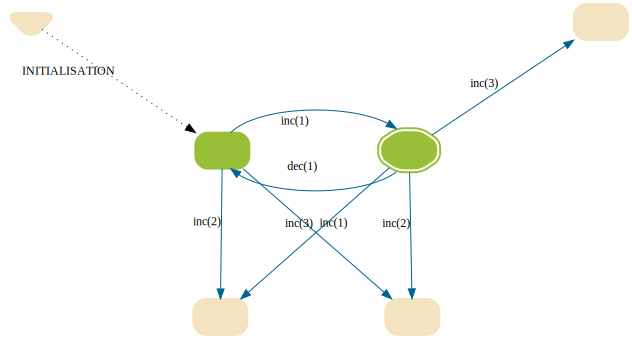

In [15]:
:dot state_space_sfdp

* Die `dot`-Visualisierungen von ProB können in Notebooks verwendet werden
* Hier wird z. B. der Zustandsraum angezeigt
* Die generierte Grafik erscheint direkt als Ergebnis im Notebook
* Kein eigenes Fenster oder Öffnen einer Datei nötig
* `ANIMATION_FUNCTION` wird auch unterstützt

## Groovy

* Die ProB 2-Groovy-Umgebung ist mit dem `:groovy`-Kommando zugänglich
* Erlaubt Zugang zu beliebigen Methoden aus der ProB 2-API

In [16]:
:groovy
def newTrace = animations.currentTrace.randomAnimation(5)
animations.changeCurrentAnimation(newTrace)

null

In [17]:
:trace

* -1: Root state
* 0: `INITIALISATION()`
* 1: `inc(1)`
* 2: `inc`
* 3: `dec`
* 4: `inc`
* 5: `dec`
* 6: `inc` **(current)**

* (Folie)
* Ermöglicht Benutzung von Funktionen, für die der Kernel noch kein eingebautes Kommando hat
* Auch für fortgeschrittene APIs/Skripting verwendbar (z. B. mehrere `Trace`s)
* Auch Hilfswerkzeug zum Debuggen des Kernels

## Syntax-Hervorhebung

![Screenshot 1](syntaxhighlighting1.png)

![Screenshot 2](syntaxhighlighting2.png)

evtl. das echte Notebook zeigen?

* Der Kernel kümmert sich nicht nur um das Ausführen von Eingaben
* Es werden auch einige Sonderfunktionen der Notebook-Oberfläche unterstützt
* z. B. Syntax-Hervorhebung für B-Ausdrücke und Maschinen, sowie `:`-Kommandos
* hier Screenshots aus der Notebook-Oberfläche von einer Formel und einer Maschine

## Code-Vervollständigung

* Tab-Taste in Jupyter Notebook
* Unterstützt z. B. Kommandos und B-Schlüsselwörter und -Bezeichner

![Screenshot 1](codecompletion1.png) ![Screenshot 2](codecompletion2.png)

* (Folie)
* Vorschläge werden vom ProB 2-Jupyter-Kernel dem Jupyter bereitgestellt

## Inspektion

* Shift+Tab in Jupyter Notebook
* Zeigt Informationen zu einem Teil des Codes an, z. B.:
    * Für B-Variablen: Typ und Wert
    * Für Kommandos: Hilfetext

![Screenshot 1](inspect1.png)

![Screenshot 2](inspect2.png)

* (Folie)
* Einige andere Elemente unterstützten auch Inspektion (z. B. Präferenzen)

## Weitere Funktionen

In [18]:
:help

Type a valid B expression, or one of the following commands:

* `::load` Load the machine source code given in the cell body.
* `::render` Render some content with the specified MIME type.
* `:assert` Ensure that the predicate is true, and show an error otherwise.
* `:browse` Show information about the current state.
* `:check` Check the machine's properties, invariant, or assertions in the current state.
* `:constants` Set up the current machine's constants.
* `:dot` Execute and show a dot visualisation.
* `:eval` Evaluate a formula and display the result.
* `:exec` Execute an operation.
* `:find` Try to find a state for which the given predicate is true (in addition to the machine's invariant).
* `:goto` Go to the state with the specified index in the current trace.
* `:groovy` Evaluate the given Groovy expression.
* `:help` Display help for a specific command, or general help about the REPL.
* `:init` Initialise the current machine with the specified predicate
* `:let` Evaluate an expression and store it in a local variable.
* `:load` Load the machine from the given path.
* `:pref` View or change the value of one or more preferences.
* `:prettyprint` Pretty-print a predicate.
* `:show` Show the machine's animation function visualisation for the current state.
* `:solve` Solve a predicate with the specified solver.
* `:stats` Show statistics about the state space.
* `:table` Display an expression as a table.
* `:time` Execute the given command and measure how long it takes to execute.
* `:trace` Display all states and transitions in the current trace.
* `:type` Display the type of a formula.
* `:unlet` Remove a local variable.
* `:version` Display version info about the ProB CLI and ProB 2.


* Es gibt noch einige weitere Funktionen, insbesondere Kommandos
* Diese werden der Kürze halber hier nicht alle vorgestellt

# Anwendungsmöglichkeiten

* Mögliche Anwendungen für den ProB 2-Jupyter-Kernel und ProB-Notebooks

## Interaktive Nutzung als REPL

* Jupyter Notebook kann wie eine REPL benutzt werden
* Vorteile: mehrzeilige Eingaben, formatierte Ausgaben, verbesserte Editor-Funktionen, speicherbar
* Alternative: `jupyter console` ermöglicht Verwendung von Jupyter-Kerneln im Terminal
    * Verhält sich wie eine klassische REPL, arbeitet nicht mit Notebooks
    * Unterstützt trotzdem erweiterte Funktionen: Eingabeverlauf, Code-Vervollständigung

* (Folie)
* Alle Vorteile von Jupyter-Notebooks:
    * einfache mehrzeilige Eingaben
    * formatierte Ausgaben
    * Editor-Funktionen (Syntax-Highlighting, Code-Completion)
    * speicherbar
* Alternative: `jupyter console`
    * (Folie)

## Interaktive Experimentierung

* Beliebige Stellen im Notebook können bearbeitet und neu ausgeführt werden
* Vereinfacht Testen von Änderungen am Code, z. B.:
    * Andere Konstanten-/Präferenzwerte
    * Hinzufügen/Entfernen von Invarianten/Guards
    * Ändern der Operationsfolge
* Auch Notebooks von anderen Nutzern können ohne Weiteres bearbeitet werden
    * Notebook-Dateien sind nie "schreibgeschützt"
    * Anzeige und Bearbeitung nutzen die gleiche Oberfläche
* Anwendungen:
    * ProB-Notebook als Dokumentation und Beispielcode zu einem B-Modell
    * Übungsblätter für Lehrveranstaltungen als Notebooks

## Generierung von Dokumenten

* `jupyter nbconvert` konvertiert Notebooks in Standard-Dokumentformate
* Ermöglicht Betrachtung ohne Jupyter
    * Nachteil: ohne Original-Notebook nicht mehr änderbar
* Unterstützte Formate:
    * HTML (für Webseiten)
    * PDF (für eigenständige Dateien)
    * $\LaTeX$ (für Publikationen)
    * reveal.js (für Präsentationen)

# Future Work

* Mehr Kommandos:
    * Temporäre ("lokale") Variablen mit `:let`
    * Verifikation (LTL, Model Checking)
    * Diagramme: Plotten von Werten im Verlauf des Traces
* `In`/`Out`-Arrays um vorherige Eingaben/Ergebnisse abzurufen
* Integration mit ProB 2-Trace-Dateien
    * Konvertierung zwischen `.prob2trace` und `.ipynb`

* Vom Funktionsumfang noch weit von `probcli -repl` entfernt
* Trotzdem bereits zu einigen Zwecken verwendbar, z. B.:
    * diese Präsentation wurde in einem ProB-Notebook geschrieben
    * die aktuelle "Sicherheitskritische Systeme"-Vorlesung

# `END`